# Predicting GBP/USD Currency Exchange Rate Using RNN (Final model)


## Install the dependencies

In [1]:
%pip install numpy pandas scikit-learn matplotlib keras tensorflow

Note: you may need to restart the kernel to use updated packages.


To finalize the model that uses LSTM with the 'Open' and 'Volume' features on 5-minute tick data, and then demonstrate predictions, we'll execute the following steps:

1) Train the Final Model using the entire dataset.
2) Make Predictions using the most recent data.
3) Visualize the Results on a plot to compare the actual closing prices with the predicted ones.

## Step 1: Data Loading and Preprocessing


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt


# get the historical data of GBPUSD from 2022.01.01 to 2023.12.31
data = pd.read_csv("GBPUSD_5 Mins_Ask_2022.01.01_2023.12.31.csv") 
print(data.shape)
data.head(10)

(149580, 6)


,Time (EET),Open,High,Low,Close,Volume
0,2022.01.03 00:00:00,1.35356,1.35357,1.35348,1.35348,12.2200
1,2022.01.03 00:05:00,1.35348,1.35348,1.35348,1.35348,0.3700
2,2022.01.03 00:10:00,1.35348,1.35382,1.35348,1.35367,7.4100
3,2022.01.03 00:15:00,1.35367,1.35367,1.35367,1.35367,1.4000
4,2022.01.03 00:20:00,1.35347,1.35363,1.35347,1.35363,0.7000
5,2022.01.03 00:25:00,1.35363,1.35363,1.35348,1.35348,10.3000
6,2022.01.03 00:30:00,1.35348,1.35349,1.35317,1.35318,8.7875
7,2022.01.03 00:35:00,1.35317,1.35354,1.35310,1.35354,1.9775
8,2022.01.03 00:40:00,1.35351,1.35388,1.35331,1.35346,72.2475
9,2022.01.03 00:45:00,1.35347,1.35359,1.35319,1.35325,34.3484


We’ll predict the **closing prices,** which can be accessed in the **Close column.**



In [14]:
# Selecting 'Open', 'Volume' as features and 'Close' as target
features = data[['Open', 'Volume']].values
target = data['Close'].values

# Normalizing the data
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()
features_scaled = scaler_features.fit_transform(features)
target_scaled = scaler_target.fit_transform(target.reshape(-1, 1))

# Reshaping input to be [samples, time steps, features] which is required for LSTM
X = features_scaled.reshape((features_scaled.shape[0], 1, features_scaled.shape[1]))
y = target_scaled


## Step 2: Model Building

In [15]:
# Building the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 2)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

print(model.summary()) 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50)                10600     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10651 (41.61 KB)
Trainable params: 10651 (41.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None



## Step 3: Model Training

In [16]:
# Train the model
model.fit(X, y, epochs=10, batch_size=32, verbose=1)


Epoch 1/10
4675/4675 [==============================] - 4s 825us/step - loss: 0.0057
Epoch 2/10
4675/4675 [==============================] - 4s 860us/step - loss: 3.4582e-06
Epoch 3/10
4675/4675 [==============================] - 4s 818us/step - loss: 3.1176e-06
Epoch 4/10
4675/4675 [==============================] - 4s 877us/step - loss: 2.8860e-06
Epoch 5/10
4675/4675 [==============================] - 4s 840us/step - loss: 2.7501e-06
Epoch 6/10
4675/4675 [==============================] - 4s 825us/step - loss: 2.7578e-06
Epoch 7/10
4675/4675 [==============================] - 4s 825us/step - loss: 2.6910e-06
Epoch 8/10
4675/4675 [==============================] - 4s 877us/step - loss: 2.7436e-06
Epoch 9/10
4675/4675 [==============================] - 4s 841us/step - loss: 2.7195e-06
Epoch 10/10
4675/4675 [==============================] - 4s 846us/step - loss: 2.7225e-06


## Step 4: Model Evaluation

In [18]:
# Making predictions
predictions_scaled = model.predict(X)

# Rescaling the predictions back to the original scale
predictions = scaler_target.inverse_transform(predictions_scaled)
actual = scaler_target.inverse_transform(y)

# Calculating evaluation metrics
mse = mean_squared_error(actual, predictions)
mape = mean_absolute_percentage_error(actual, predictions)

# Creating a table for results
results_df = pd.DataFrame({
    "Metric": ["Mean Squared Error", "Mean Absolute Percentage Error"],
    "Value": [mse, mape]
})

# Displaying the results in a DataFrame
print(results_df)

4675/4675 [==============================] - 2s 445us/step
                           Metric         Value
0              Mean Squared Error  2.602210e-07
1  Mean Absolute Percentage Error  2.776081e-04


## Step 5: The Results

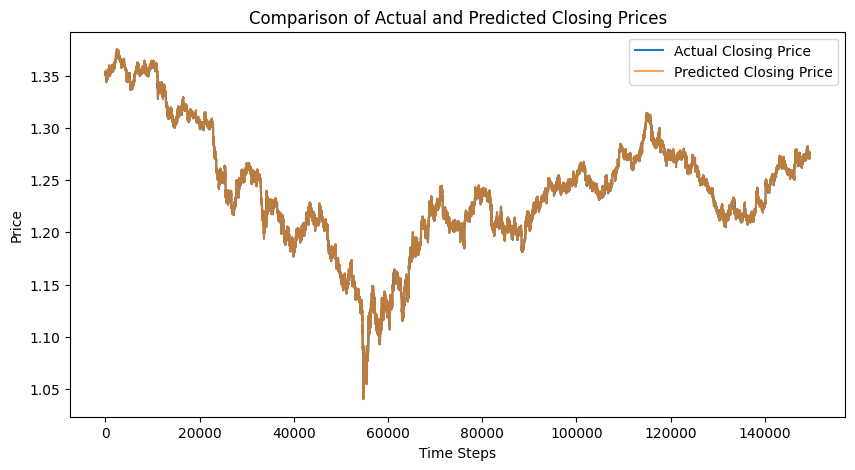

In [20]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(actual, label='Actual Closing Price')
plt.plot(predictions, label='Predicted Closing Price', alpha=0.7)
plt.title('Comparison of Actual and Predicted Closing Prices')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()